# Exploratory Data Aanlysis

The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 

Exploratory data analysis is divided into 3 different types of analysis:
    1. univariate, 
    2. bivariate or 
    3. multivariate.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

# Concatenate along the second axis using np.c_[]
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df)
print(df.dtypes)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species         float64
dtype: object


## 1. Univariate Analysis

The objective of univariate analysis is to explore each variable separately and summarize it, and analyze the pattern present in it.

1. Swarm plot
2. Histograms with and without Kernel Density Estimate(kde)
3. Box plots
4. Bar chart(Categorical)
5. Pie chart

In [3]:
df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

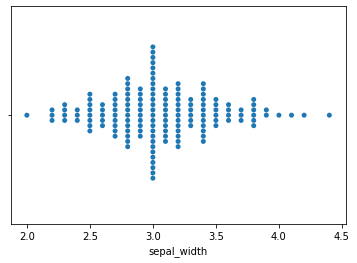

In [4]:
'''
1. Swarm plot
Provides a visualization technique for univariate data to view the spread of 
values in a continuous variable. Swarm-plot spreads out the data points of the 
variable automatically to avoid overlapping.
'''
fig = sns.swarmplot(x=df['sepal_width'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


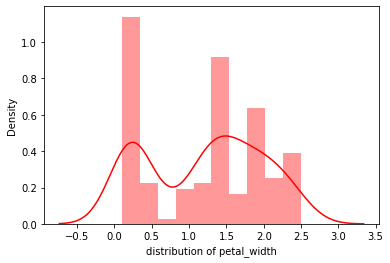

In [5]:
'''
2. Histogram display the counts or relative frequencies of values falling in different 
class intervals or ranges.

Histograms with Kernel Density Estimate(kde). Kernel density estimation 
presents a different solution to the same problem. Rather than using discrete 
bins, a KDE plot smooths the observations with a Gaussian kernel, producing a 
continuous density estimate
'''

fig = sns.distplot(df['petal_width'], bins=10, kde = True,
                  color='red', vertical=False, 
                  axlabel='distribution of petal_width')

In [6]:
'''
5. box plots
displaying the distribution of data based on a five-number summary (minimum, 
first quartile, second quartile(median), third quartile, maximum).
It can tell you about your outliers and what their values are. It can also 
tell you if your data is symmetrical, how tightly your data is grouped, and if 
and how your data is skewed.
'''

'\n5. box plots\ndisplaying the distribution of data based on a five-number summary (minimum, \nfirst quartile, second quartile(median), third quartile, maximum).\nIt can tell you about your outliers and what their values are. It can also \ntell you if your data is symmetrical, how tightly your data is grouped, and if \nand how your data is skewed.\n'

![](https://miro.medium.com/max/628/1*FPnhYs6cs3ipUKIZhl9caA.png)

The empirical rule, or the 68-95-99.7 rule, tells you where your values lie:

- Around 68% of scores are within 1 standard deviation of the mean,
- Around 95% of scores are within 2 standard deviations of the mean,
- Around 99.7% of scores are within 3 standard deviations of the mean.

The IQR give the 50% of the data points. And if we take the range from minimum to maximum, then it includes 99.3 %.
Its a thumb of rule to take 1.5. IF scale = 1, then it would cover ~95% of data points and because makes the decision range too exclusive, means this results in too much outliers. IF we take 2 times IQR then, this makes the decision range too inclusive, means this results in too few outliers.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

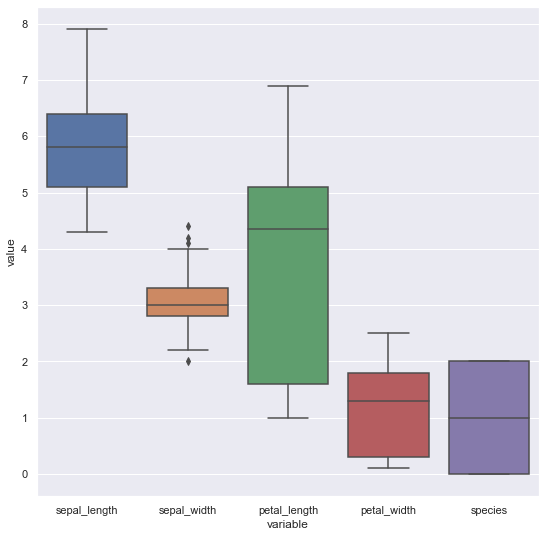

In [7]:
sns.set(rc = {'figure.figsize': (9, 9)})
# fig = sns.boxplot(df['sepal_width'])
fig = sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [8]:
pd.melt(df)

,variable,value
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7
3,sepal_length,4.6
4,sepal_length,5.0
...,...,...
745,species,2.0
746,species,2.0
747,species,2.0
748,species,2.0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


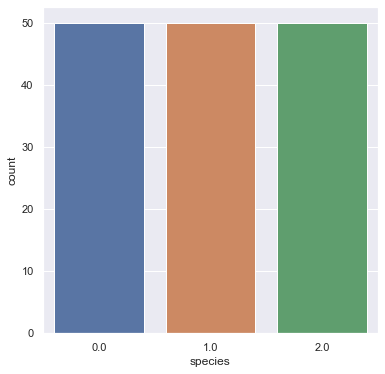

In [9]:
'''
6. Bar chart(Categorical)
One axis is the category axis indicating the category, while the second axis 
is the value axis that shows the numeric value of that category, indicated by 
the length of the bar.
'''
sns.set(rc={'figure.figsize': (6, 6)})
fig = sns.countplot(df['species'])

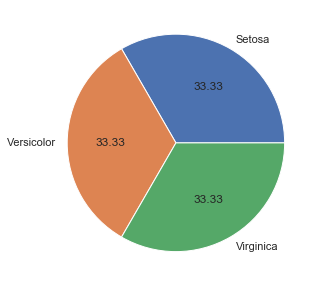

In [10]:
'''
7. Pie chart
'''
plt.figure(figsize=(5, 5))
plt.pie(df['species'].value_counts(), autopct='%.2f', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

## 2. Bivariate Analysis
The analysis is related to find the relationship between the two variables.

![](https://editor.analyticsvidhya.com/uploads/78011Picture3.png)

### Continuous Vs Continuous
1. Scatter plot
2. Line plot

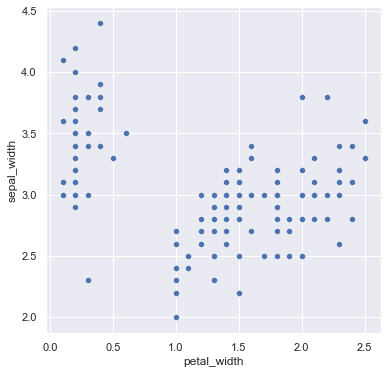

In [11]:
# Scatter plot

sns.scatterplot(x=df['petal_width'], y=df['sepal_width']) 
#                 hue=df['species'], palette="deep", size=df["species"], sizes=(20, 200), legend="full")
plt.show()

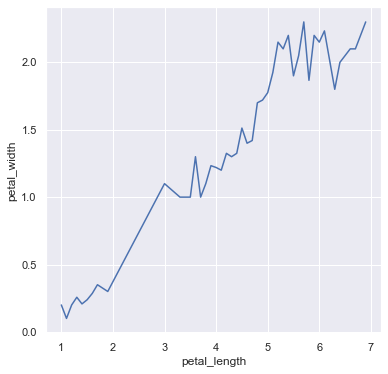

In [12]:
# Line Plot

fig = sns.lineplot(x=df["petal_length"], y=df["petal_width"], ci=None)
# Passing the entire dataset in long-form mode will aggregate over repeated 
# values (each year) to show the mean and 95% confidence interval:

### Continuous Vs Categorical
1. Swarm plot
2. Strip plot
3. Box plot
4. Bar plot

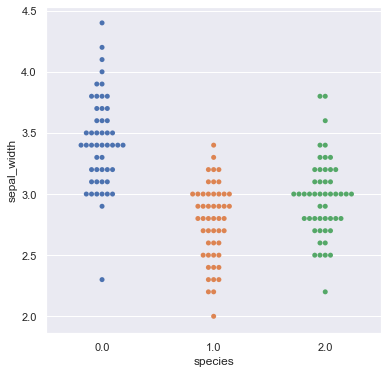

In [13]:
# Swarm plot

fig = sns.swarmplot(x=df['species'], y=df['sepal_width'])

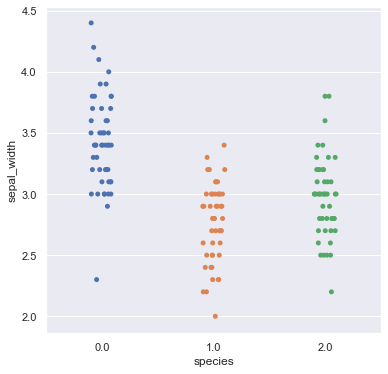

In [14]:
fig = sns.stripplot(x=df['species'], y=df['sepal_width'])

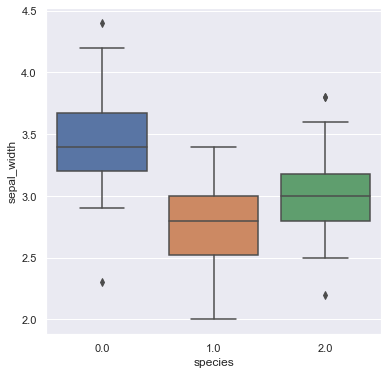

In [15]:
# Box plot

fig = sns.boxplot(x='species', y='sepal_width', data=df, palette='deep')

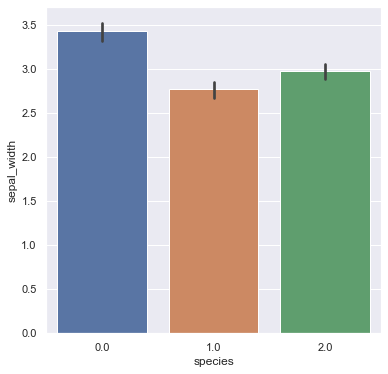

In [16]:
ax = sns.barplot(x="species", y="sepal_width", data=df)

### Categorical Vs Categorical
1. Crosstab
2. Stacked bar charts
2. Heatmap using pivot

In [17]:
pd.read_csv('LP1_exam/da3/train.csv')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df2 = pd.read_csv('LP1_exam/da3/train.csv')
df2 = df2[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Item_MRP']]
df2['Item_MRP'] = df2['Item_MRP'].round()
df2['Item_MRP'] = df2['Item_MRP']/2
# df2['Item_MRP'] = df2['Item_MRP'].astype(int)
df2.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Item_MRP
0,Low Fat,Dairy,Medium,Tier 1,125.0
1,Regular,Soft Drinks,Medium,Tier 3,24.0
2,Low Fat,Meat,Medium,Tier 1,71.0
3,Regular,Fruits and Vegetables,NaN,Tier 3,91.0
4,Low Fat,Household,High,Tier 3,27.0


In [19]:
# Crosstab
# process by which totals and other calculations are performed based on common 
# values found in a set of data.

print('normal:\n', pd.crosstab(df2['Item_Fat_Content'], df2['Outlet_Size']))
print('normal with margin:\n', pd.crosstab(df2['Item_Fat_Content'], df2['Outlet_Size'], margins = True))
pd.crosstab(df2['Item_Fat_Content'], df2['Outlet_Size'], normalize = True).style.format('{:.2%}')

# print(pd.crosstab(df2['Item_Fat_Content'], [df2['Outlet_Size'], df2['Item_Type']]))

normal:
 Outlet_Size       High  Medium  Small
Item_Fat_Content                     
LF                  32     105     96
Low Fat            556    1660   1425
Regular            313     952    811
low fat             18      34     29
reg                 13      42     27
normal with margin:
 Outlet_Size       High  Medium  Small   All
Item_Fat_Content                           
LF                  32     105     96   233
Low Fat            556    1660   1425  3641
Regular            313     952    811  2076
low fat             18      34     29    81
reg                 13      42     27    82
All                932    2793   2388  6113


Outlet_Size,High,Medium,Small
Item_Fat_Content,,,
LF,0.52%,1.72%,1.57%
Low Fat,9.10%,27.16%,23.31%
Regular,5.12%,15.57%,13.27%
low fat,0.29%,0.56%,0.47%
reg,0.21%,0.69%,0.44%


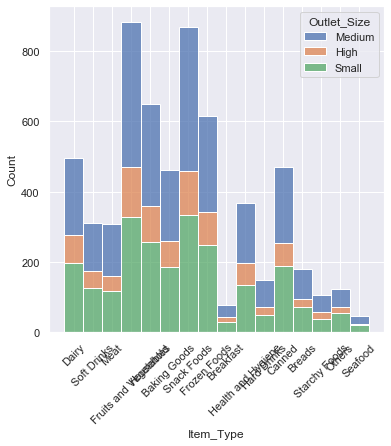

In [20]:
fig = sns.histplot(data=df2, stat="count", multiple="stack",
             x="Item_Type", kde=False,
             palette="deep", hue="Outlet_Size",
              legend=True)
fig.tick_params(axis='x', rotation=45)

In [21]:
pivot = pd.pivot_table(df2, index='Item_Fat_Content', columns='Item_Type', aggfunc='mean')
pivot

Item_MRP                                              \
Item_Type        Baking Goods     Breads  Breakfast     Canned      Dairy   
Item_Fat_Content                                                            
LF                  57.775000  60.312500  69.250000  62.000000  65.541667   
Low Fat             60.637874  69.146825  83.294872  69.909236  74.051047   
Regular             66.650327  75.240741  64.701493  70.215488  75.238372   
low fat             52.062500  38.000000        NaN  78.400000  73.708333   
reg                 55.692308  47.833333  38.500000  64.363636  80.083333   

                                                                 \
Item_Type        Frozen Foods Fruits and Vegetables Hard Drinks   
Item_Fat_Content                                                  
LF                  80.863636             70.769231   68.500000   
Low Fat             69.037736             68.220690   68.884422   
Regular             68.992248             76.324090         NaN   
low fat             57.625000             62.272727   58.714286   
reg                 68.473684             80.120000         NaN   

                                                                       \
Item_Type        Health and Hygiene  Household        Meat     Others   
Item_Fat_Content                                                        
LF                        67.706897  72.953704   59.550000  71.681818   
Low Fat                   65.517672  74.779762   65.490566  66.615385   
Regular                         NaN        NaN   72.383065        NaN   
low fat                   52.750000  77.281250  122.000000  23.750000   
reg                             NaN        NaN   91.571429        NaN   

                                                                   
Item_Type           Seafood Snack Foods Soft Drinks Starchy Foods  
Item_Fat_Content                                                   
LF                51.750000   73.629032   69.750000     78.500000  
Low Fat           58.609375   78.513953   65.839233     79.305556  
Regular           90.333333   66.542268   60.485714     66.932203  
low fat           17.000000   76.687500   93.857143     62.000000  
reg                     NaN   56.260870   88.000000     73.642857

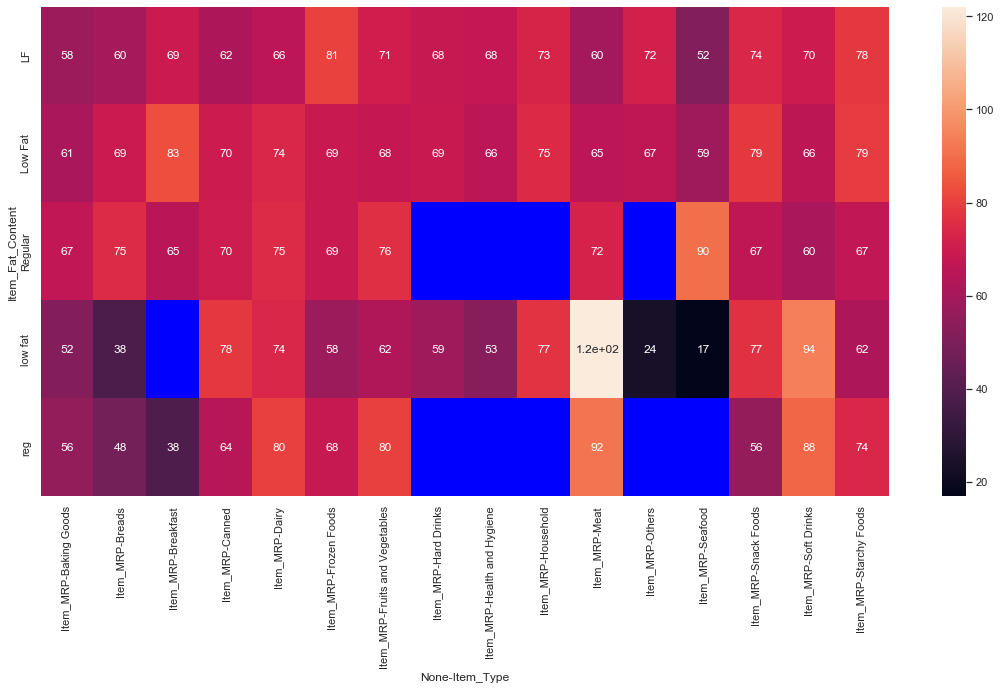

In [22]:
color = plt.get_cmap()   
color.set_bad('blue') 

sns.set(rc={'figure.figsize': (19, 9)}) 
fig = sns.heatmap(data=pivot, annot=True, cmap=color)

### MultiVariate Analysis
Multivariate analysis is concerned with the interrelationships among several variables. The data may be metrical, categorical, or a mixture of the two.
1. Paragrid
2. Heatmaps
3. Scatter plot using Hue
4. relplot
5. Line plot
6. Bar plot using hue
7. Box plot

In [23]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


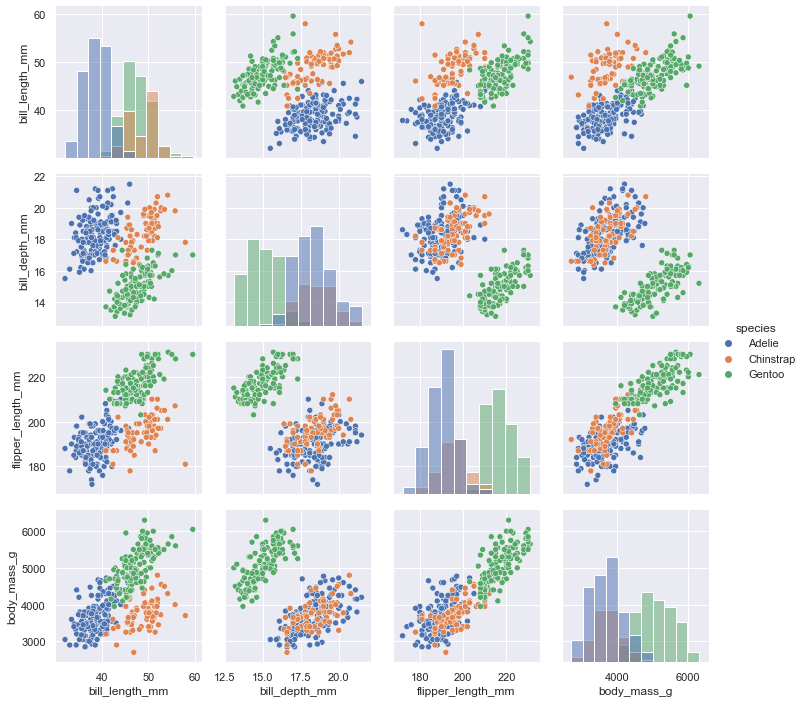

In [24]:
# Paragrid

g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
fig = g.add_legend()

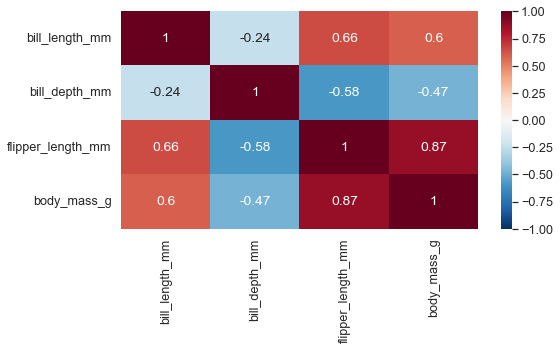

In [25]:
# Heat maps

sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(penguins.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1);

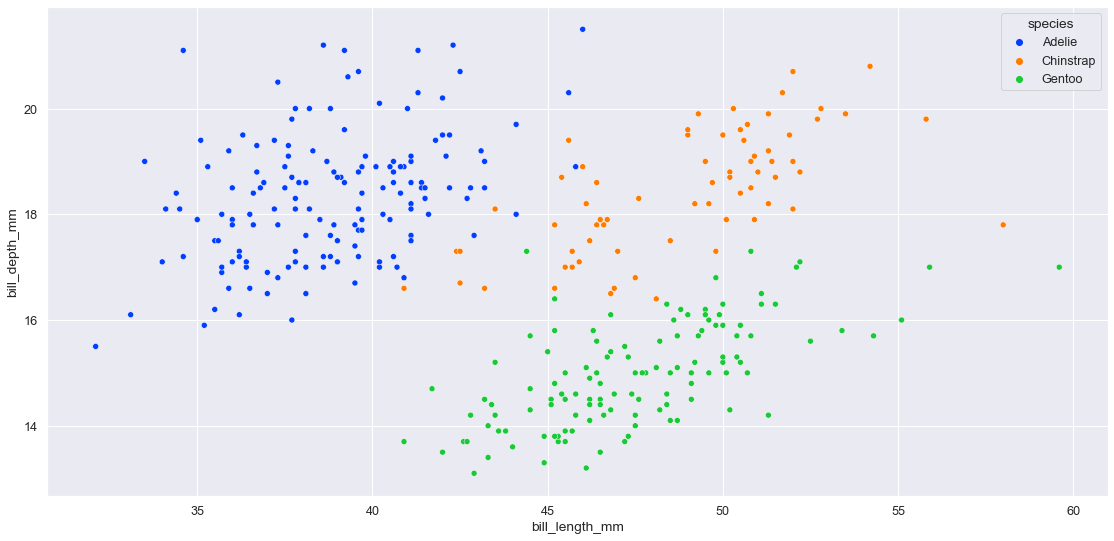

In [26]:
# Scatter plot using Hue

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, palette='bright', hue='species');

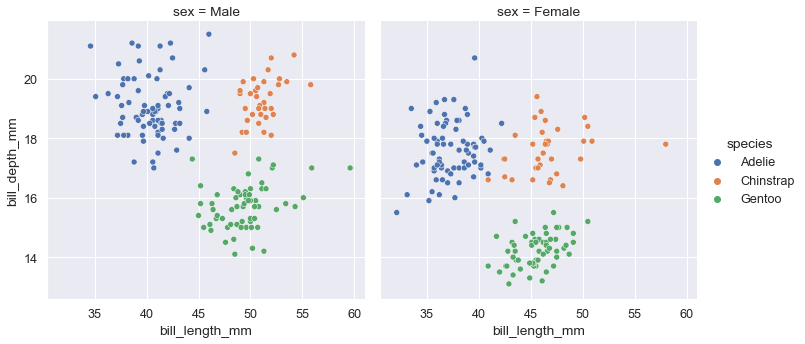

In [27]:
#relplot:This function provides access to several different axes-level functions that show the relationship between two variable
fig = sns.relplot(
        x='bill_length_mm', 
        y='bill_depth_mm', 
        data=penguins, 
        kind='scatter', 
        col='sex',
        hue='species')

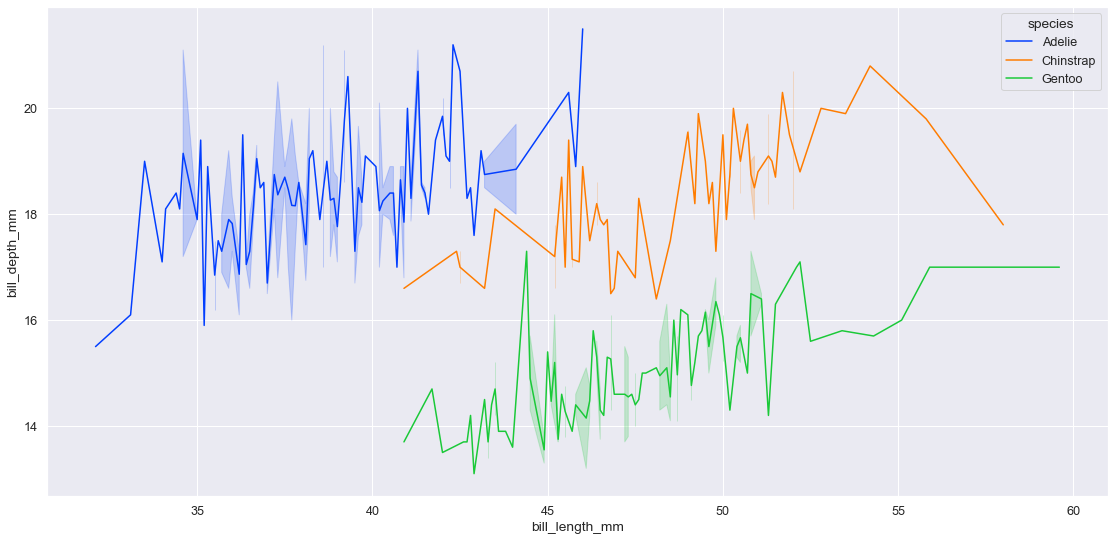

In [28]:
# Line Plot

sns.lineplot(
    x="bill_length_mm", 
    y="bill_depth_mm",
    data=penguins,
    palette='bright',
    hue='species');

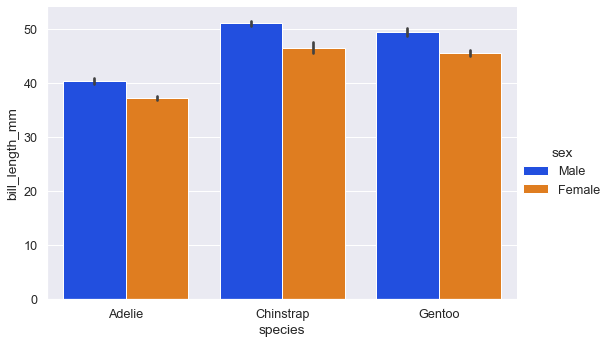

In [29]:
# Bar plot

sns.catplot(
    x='species', 
    y='bill_length_mm', 
    data=penguins,
    palette='bright',
    kind='bar',
    hue='sex',
    aspect=1.5);

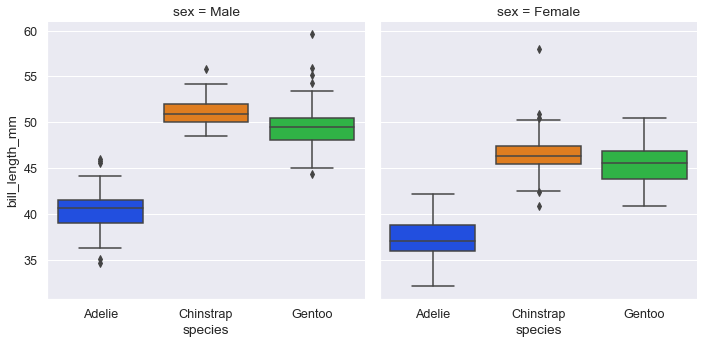

In [30]:
# Box plot

sns.catplot(
    x='species', 
    y='bill_length_mm',
    data=penguins,
    palette='bright',
    kind = 'box', 
    col='sex');

### Variance, Standard Deviation, Covariance

In [31]:
df = pd.DataFrame({
    'a':[1,3,4,6,8],
    'b':[2,3,5,6,8],
    'c':[6,5,4,3,2],
    'd':[5,4,3,4,6]
})
df

,a,b,c,d
0,1,2,6,5
1,3,3,5,4
2,4,5,4,3
3,6,6,3,4
4,8,8,2,6


### Variance :
Variance is the spread of values in a dataset around its mean value. It tells you how far each number in the dataset is 
from its mean.
![](https://miro.medium.com/max/830/1*svs4R44GU6esJ-xYiyoIFQ.png)
For **sample variance**, the denominator is n-1. For **population variance**, the denominator is n.
Higher the variance, higher the dispersion of data points.

Why do we subtract 1: When you have an entire population and calculate any parameter (like the population variance or population standard deviation), your results will be accurate. That’s because you have all the data about your population. However, when you work with a sample, you’ve only got a small fraction of the population to work with. Therefore, your answers aren’t going to be as accurate as those you would have got, if you had the entire set of data to work with.


The square root of variance (s²) is the **standard deviation** (s).

The benefit of reporting standard deviation is that it remains in the scale of data. Say, a sample of adult heights is in meters, then standard deviation will also be in meters, whereas the variance will be in meters square.


In [32]:
var = (np.square(df['a'] - df['a'].mean())).sum() / (df.shape[0] - 1)
print(np.var(df['a'], ddof=0))
print(np.std(df['a'], ddof=0))

5.84
2.4166091947189146


### Covariance
Covariance is a measure of how changes in one variable are associated with changes in a second variable.

![](https://miro.medium.com/max/998/1*JxqOikQflNrmsoImC_vnsQ.png)

In [33]:
np.cov(df['a'],df['b'])
# (0, 0) and (1, 1) are the variance of df['a'] and df['b'] respectively and (0, 1) and (1, 0) is the covariance of a and b

array([[7.3 , 6.35],
       [6.35, 5.7 ]])

In [34]:
#type of covariance
'''
1. Positive covariance: 
A positive covariance indicates that both random variables tend to move upward or downward at the same time.'''
print(f'covariance between a and b:', np.cov(df['a'], df['b'])[0][1])

'''
2. Negative covariance:
 A negative covariance indicates that both variables tend to move away from each other — when one moves upward the other moves 
 downward, and vice versa.'''
print(f'covariance between c and b:', np.cov(df['c'],df['b'])[0][1])

covariance between a and b: 6.35
covariance between c and b: -3.75


#### Correlation is a normalized version of the covariance
Correlation is a normalized version of the covariance. 
![](https://miro.medium.com/max/520/1*8C_VvGhYWJFJft8vlmO3sw.png)
By dividing the covariance by the features’ standard deviations, we ensure that the correlation between two features is in the range [-1, 1], which makes it more interpretable than the unbounded covariance.

In [35]:
np.corrcoef(df['a'], df['b'])

# (0, 0) and (1, 1) are the correlation of (a, a) and (b, b) respectively and (0, 1) and (1, 0) is the corr of (a, b)

array([[1.        , 0.98440739],
       [0.98440739, 1.        ]])

### Chi square test (Categorical-Categorical)
The Chi-square test is one of the statistical tests we can use to decide whether there is a correlation between the categorical variables. 

We start by defining the **null hypothesis (H0)** which states that there is **no relation** between the variables. An alternate hypothesis would state that there is a significant relation between the two.

We define a significance factor to determine whether the relation between the variables is of considerable significance. It tells us about the percentage of risk involved in saying that a difference exists between two groups, when in reality it does not.

Generally a significance factor or **alpha value** of 0.05 is chosen. This alpha value denotes the probability of erroneously rejecting H0 when it is true. A lower alpha value is chosen in cases where we expect more precision. If the p-value for the test comes out to be strictly greater than the alpha value, then H0 holds true.

p_value <= 0.05 then, H0 is rejected else H0 is accepted 

In [36]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.1031971404730939
Independent (H0 holds true)


### z-test and t-test (Numerical-Categorical(2 Categories))

If population standard deviation is known then use Z test else T test.

Z-test is used to compare the mean of two given samples and infer whether they are from the same distribution or not. We do not implement Z-test when the sample size is less than 30.

A Z-Test may be a one-sample Z test or a two-sample Z test.

1. One samples z-test: the mean of a single group against a known mean.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/image1.png)
2. Two sample z-test test: compares the means for two groups.
![](https://editor.analyticsvidhya.com/uploads/77087z-stat.gif)

In [37]:
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import norm, f_oneway

df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here we will consider Gender and ApplicantIncome for z test. 

 - Null Hypothesis: There is no significant difference between the mean Income of males and females.

 - Alternate Hypothesis: There is a significant difference between the mean Income of males and females.

So will use ztest from scipy library and pass array that gives male income and female income and a value. Value will be used to prove or disapprove the hypothesis, for null hypothesis to be true the mean of male and female income should be zero so we will pass the value as 0 (mu1 - mu2 = 0).


In [38]:
Male_income = df.loc[df['Gender']=='Male','ApplicantIncome'].values
Female_income = df.loc[df['Gender']=='Female','ApplicantIncome'].values
val = ztest(Male_income,Female_income, value=0)
print(f'stats: {val[0]} \t p-value: {val[1]}')

if p<0.05:
    print("we reject null hypothesis OR there is a difference in income of male and female.")
else:
    print("we accept null hypothesis OR there is no difference in mean income of male and female.")

stats: 1.3232838129163134 	 p-value: 0.18574101269618304
we accept null hypothesis OR there is no difference in mean income of male and female.


### Anova test (Continuous - Categorical(3 or more))
https://www.reneshbedre.com/blog/anova.html

ANOVA stands for Analysis of variance. It is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. 

In anova test, we calculate the variance between clusters and variance within clusters and then calculate the ratio between them. The ratio, deg of freedoms of betw and within cluster is used to lookup the p_value.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/image046.png)
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/image2-1.png)

The only difference between one-way and two-way ANOVA is the number of independent variables. A one-way ANOVA has one independent variable, while a two-way ANOVA has two.

One-way ANOVA: Testing the relationship between shoe brand (Nike, Adidas, Saucony, Hoka) and race finish times in a marathon.

Two-way ANOVA: Testing the relationship between shoe brand (Nike, Adidas, Saucony, Hoka), runner age group (junior, senior, master’s), and race finishing times in a marathon.
All ANOVAs are designed to test for differences among three or more groups. If you are only testing for a difference between two groups, use a t-test instead.


Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. Treatments are independent variable.

In [39]:
df = pd.DataFrame({'A': [25, 30, 28, 36, 29],
                   'B': [45, 55, 29, 56, 40],
                   'C': [30, 29, 33, 37, 27],
                   'D': [54, 60, 51, 62, 73]})
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [40]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatments', 'value']
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


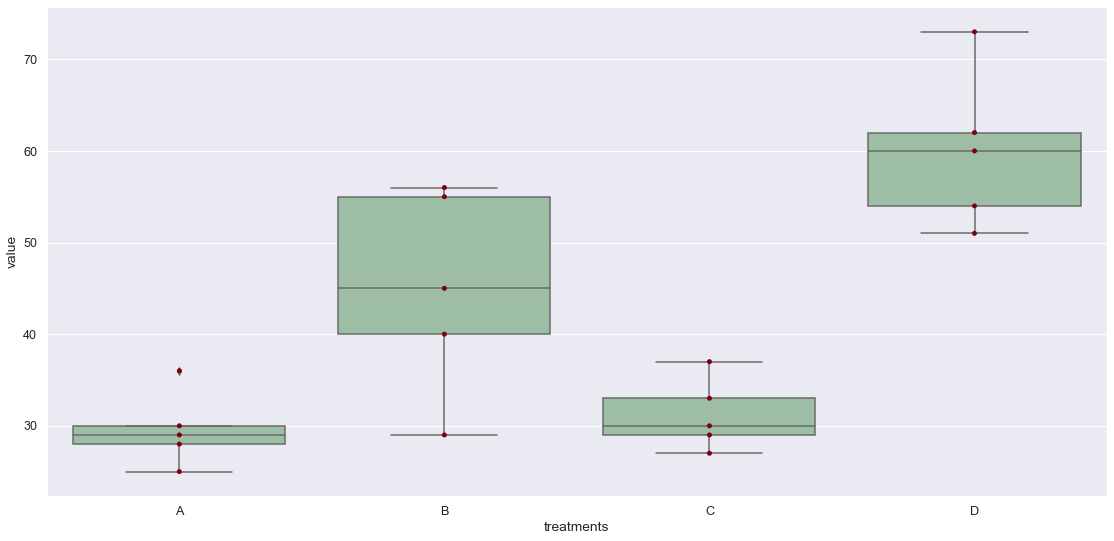

In [41]:
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis.

In [43]:
# !pip install bioinfokit

In [44]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

### Two way anova
From dataset, there are two factors (independent variables) viz. genotypes and yield in years. Using two-way ANOVA, we can simultaneously evaluate how type of genotype and years affects the yields of plants.

From two-way ANOVA, we can tests three hypotheses 
1. effect of genotype on yield 
2. effect of time (years) on yield, and 
3. effect of genotype and time (years) interactions on yield

In [45]:
df = pd.DataFrame({'Genotype': ['A','A','A','B','B','B','C','C','C','D','D','D','E','E','E','F','F','F'],
                   '1_year': [1.53,1.83,1.38,3.6,2.94,4.02,3.99,3.3,4.41,3.75,3.63,3.57,1.71,2.01,2.04,3.96,4.77,4.65],
                   '2_year': [4.08,3.84,3.96,5.7,5.07,7.2,6.09,5.88,6.51,5.19,5.37,5.55,3.6,5.1,6.99,5.25,5.28,5.07],
                   '3_year': [6.69,5.97,6.33,8.55,7.95,8.94,10.02,9.63,10.38,11.4,9.66,10.53,6.87,6.93,6.84,9.84,9.87,10.08]})
df

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [46]:
d_melt = pd.melt(df, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


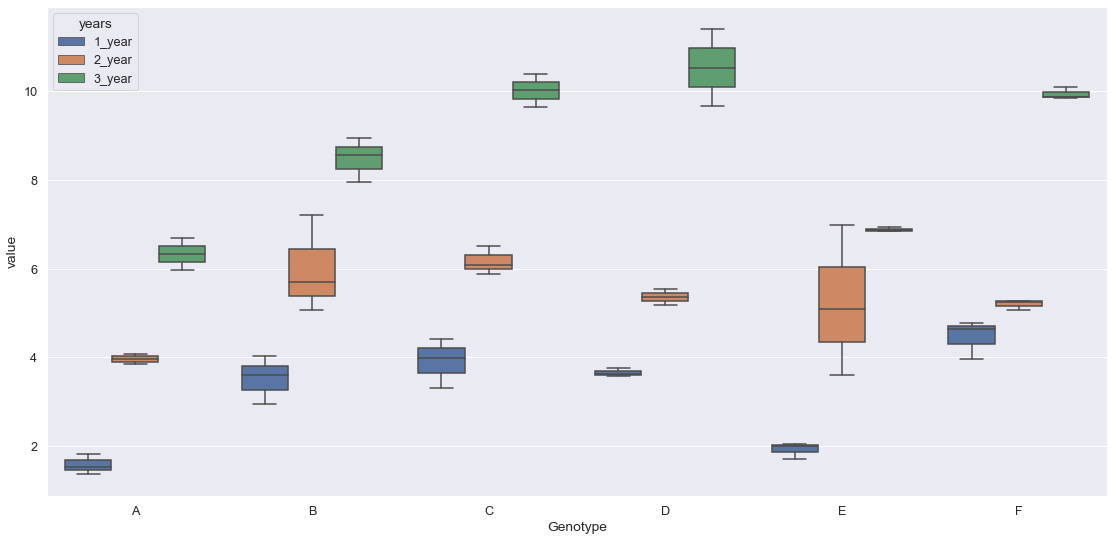

In [47]:
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="deep") 

In [48]:
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


The p value obtained from ANOVA analysis for genotype, years, and interaction are statistically significant (p<0.05). We conclude that type of genotype significantly affects the yield outcome, time (years) significantly affects the yield outcome, and interaction of both genotype and time (years) significantly affects the yield outcome.

## Outlier Treatment
Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

In [49]:
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df)
print(df.dtypes)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species         float64
dtype: object


### Detecting the outliers
Outliers can be detected using visualization, implementing mathematical formulas on the dataset, or using the statistical approach.

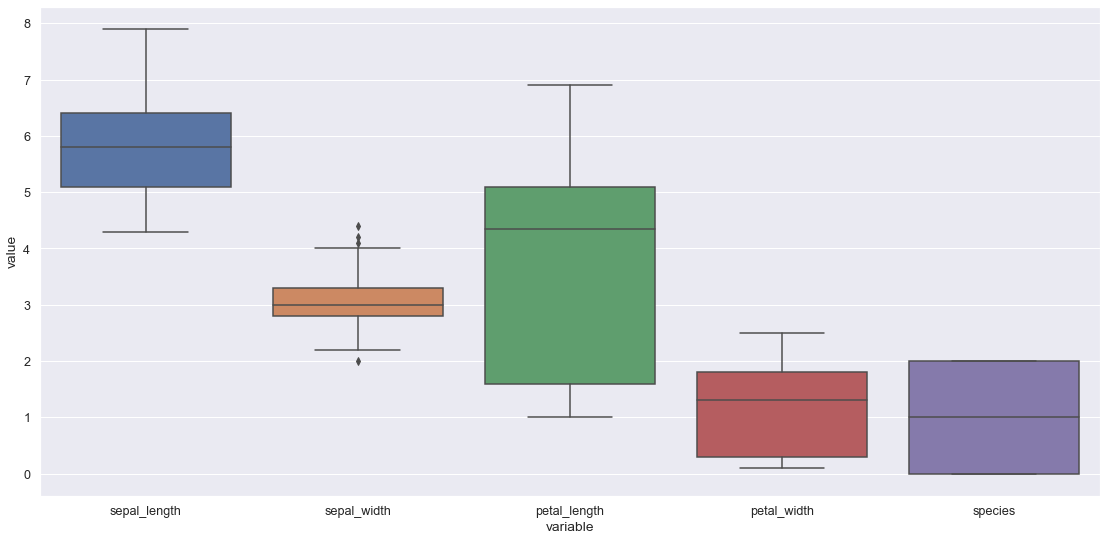

In [50]:
fig = sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [51]:
Q1 = np.percentile(df['sepal_width'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['sepal_width'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df['sepal_width'].shape)
 
# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))
 
print(f'upper: {len(upper[0])}\n lower: {len(lower[0])}')

Old Shape:  (150,)
upper: 3
 lower: 1


### Handling Outliers
1. Trimming
2. Capping
3. Imputation

1. **Trimming** is a the method of cutting off or getting rid of the outliers at the end of the dataset. This is easier than all the other methods.

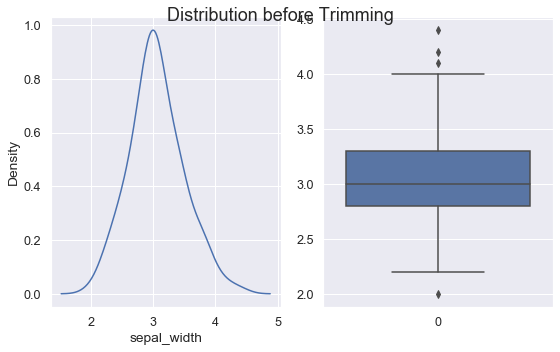

In [52]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df['sepal_width'])
plt.subplot(1,2,2)
sns.boxplot(data = df['sepal_width'])
plt.tight_layout()
plt.show()

In [53]:
print('old shape', df.shape)
temp = df[(df['sepal_width'] < (Q3+1.5*IQR)) & (df['sepal_width'] > (Q1-1.5*IQR))]
print('new shape', temp.shape)

old shape (150, 5)
new shape (146, 5)


In [54]:
len(df[(df['sepal_width'] >= (Q3+1.5*IQR)) | (df['sepal_width'] <= (Q1-1.5*IQR))])

4

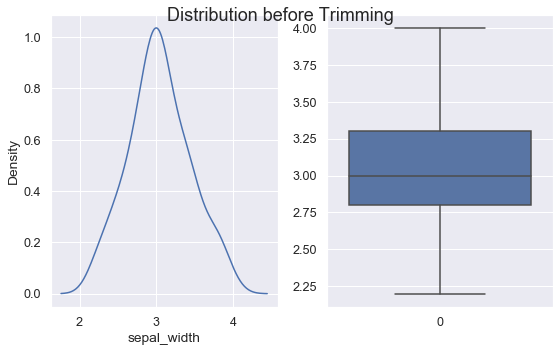

In [55]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = temp['sepal_width'])
plt.subplot(1,2,2)
sns.boxplot(data = temp['sepal_width'])
plt.tight_layout()
plt.show()


2. **Capping** is setting a limit for the feature and set the value of all the outliers exceeding the limit to the value of the limit. So in the student example, we will set a limit of score and change the score of the 2% student to that. For example, 75 is the max score limit that we set. The score of 2% outlier students will be set to 75.


In [56]:
#capping
max_limit = Q3+1.5*IQR
min_limit = Q1-1.5*IQR
df_skew_new = pd.DataFrame(np.where(df["sepal_width"] > max_limit, max_limit, 
         (np.where(df["sepal_width"] < min_limit, min_limit, df["sepal_width"]))), columns=["sepal_width"])

3. **Imputation**
Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


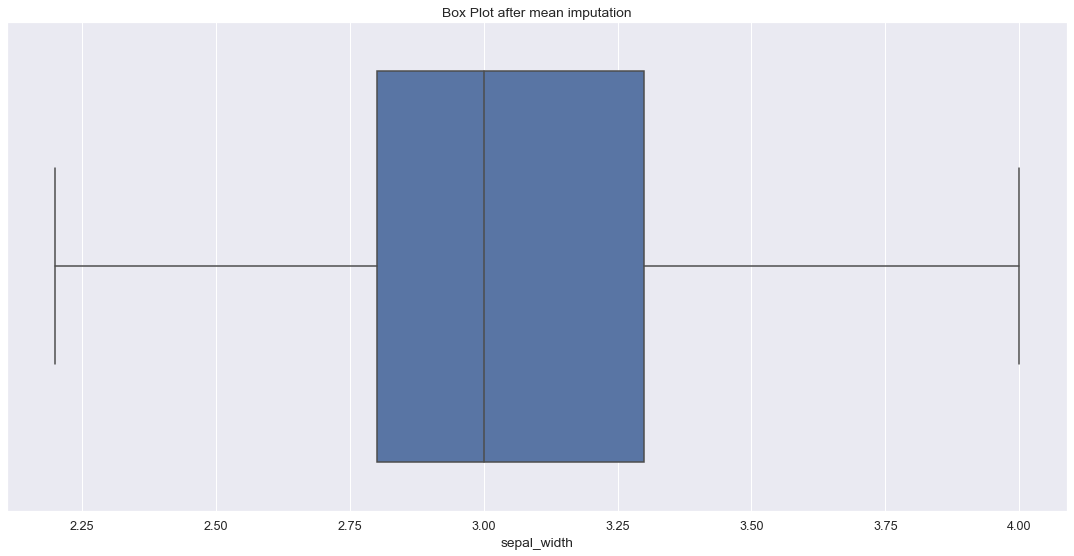

In [57]:
m = np.mean(df['sepal_width']) # or np.median(df['sepal_width']) or m=0 (replace with 0)
for i in df['sepal_width']:
    if i > max_limit or i < min_limit:
        df['sepal_width'] = df['sepal_width'].replace(i, m)
sns.boxplot(df['sepal_width'])
plt.title("Box Plot after mean imputation")
plt.show()   

In [58]:
df = pd.DataFrame(np.c_[iris.data, iris.target], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
